<a href="https://colab.research.google.com/github/AmritttSingh/PyTorch_Tutorial/blob/main/FirstNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np

In [66]:
#create model class that inherits nn.Module
class Model(nn.Module):
  #input layer - 4 features of flower -> hidden layer1(h1) -> h2 -> output(3 classes of iris flowers)
  def __init__(self,in_features=4,h1=8,h2=8,out_features=3):
    super().__init__() #instantiation
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)

    return x


In [67]:
torch.manual_seed(41)
#create instance of model
model = Model()

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [69]:
my_df = pd.read_csv("iris.csv")
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [70]:
my_df["variety"] = my_df["variety"].replace("Setosa",0.0)
my_df["variety"] = my_df["variety"].replace("Versicolor",1.0)
my_df["variety"] = my_df["variety"].replace("Virginica",2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [71]:
X = my_df.drop("variety", axis =1)
Y = my_df["variety"]

In [72]:
X = X.values
Y = Y.values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=41)

In [75]:
#conv X features into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#conv Y features into long tensors
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [76]:
criterion = nn.CrossEntropyLoss()
#optimize=Adam, LearningRate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [77]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [78]:
#train
epoch = 200
losses = []
for i in range(epoch):
  y_pred = model.forward(X_train) #get predicted results

  #measure loss/error
  loss = criterion(y_pred,Y_train)

  #keep track of loss
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #back prop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1318365335464478
Epoch: 10 and loss: 0.9658561944961548
Epoch: 20 and loss: 0.678993821144104
Epoch: 30 and loss: 0.4004894196987152
Epoch: 40 and loss: 0.2250950187444687
Epoch: 50 and loss: 0.12207333743572235
Epoch: 60 and loss: 0.07481686770915985
Epoch: 70 and loss: 0.05451279506087303
Epoch: 80 and loss: 0.044374920427799225
Epoch: 90 and loss: 0.03837944194674492
Epoch: 100 and loss: 0.03434774652123451
Epoch: 110 and loss: 0.031376760452985764
Epoch: 120 and loss: 0.029054991900920868
Epoch: 130 and loss: 0.027161750942468643
Epoch: 140 and loss: 0.025570694357156754
Epoch: 150 and loss: 0.024206874892115593
Epoch: 160 and loss: 0.023014307022094727
Epoch: 170 and loss: 0.021954992786049843
Epoch: 180 and loss: 0.021001281216740608
Epoch: 190 and loss: 0.020137621089816093


Text(0.5, 0, 'Epoch')

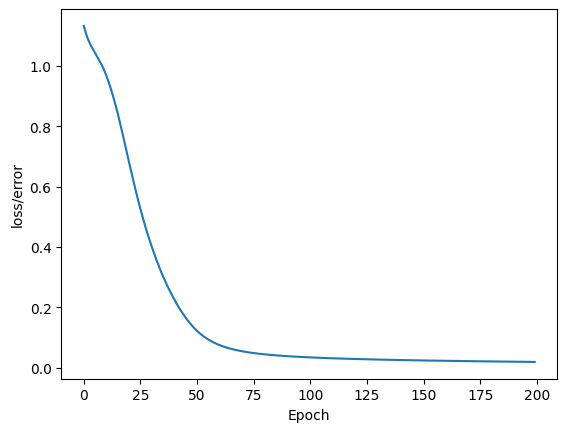

In [79]:
plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")